In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Quick info
It's samples of yogurt where the concentration of riboflavin has been measured with excitation and emission spectroscopy. There's is also further information about each sample in the file "info_conditions.csv" and "conditions.csv".
The file "conditions.csv" has the following four extra variables about each sample:
1. Batch no. (0/1)
2. Light (0=Light, 1=darkness)
3. Packaging (0=polylactate, 1=polystyrene)
4. Storage time in days

For more info, please refer to the following paper. This paper should also be cited if you intend to use this dataset for anything serious :-):
    Christensen, J., Miquel Becker, E., and Frederiksen, C.S.
    Fluorescence Spectroscopy and PARAFAC in analysis of yoghurt
    Chemometrics and Intelligent Laboratory 75(2005)201-208

In [40]:
riboflavin = np.genfromtxt("./yogurt/riboflavin.csv", delimiter=",")  # concentrations of riboflavin
em = np.genfromtxt("./yogurt/Em.csv", delimiter=",")  # emission axis
ex = np.genfromtxt("./yogurt/Ex.csv", delimiter=",")  # excitation axis
X = np.genfromtxt("./yogurt/X.csv", delimiter=",")  # measurements

In [41]:
print(em)
print(ex)
print(X.shape)

[310. 330. 350. 370. 390. 410. 430. 450. 470. 490. 510. 530. 550. 570.
 590.]
[270. 290. 310. 330. 350. 370. 390. 410. 430. 450. 470. 490. 510. 530.
 550.]
(125, 225)


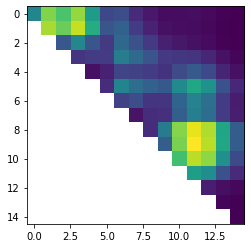

In [52]:
X_2dhists = np.array([x.reshape((15, 15)) for x in X])
plt.imshow(X_2dhists[0])

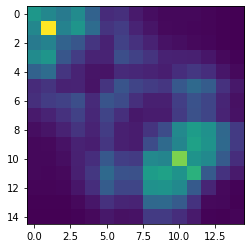

In [62]:
new_X = []

for sample in X_2dhists:
    tmp = np.nan_to_num(sample.copy())
    tmp_diag = np.diag(tmp)

    tmp += tmp.T
    indices = np.arange(len(tmp))
    tmp[indices, indices] = tmp_diag

    new_X.append(tmp)
new_X = np.array(new_X)
plt.imshow(new_X[0])
plt.show()

(125, 225)


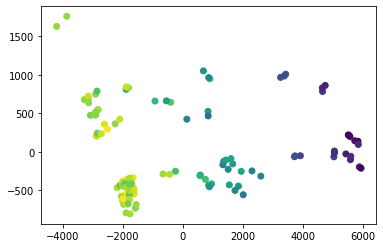

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_X = np.array([x.ravel() for x in new_X])  # ravel again to make it nice for PCA
trans = pca.fit_transform(new_X)

plt.scatter(trans[:, 0], trans[:, 1], c=riboflavin)
plt.show()